In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
import matplotlib.pyplot as plt

In [2]:
folder = r"C:\Users\ytxu\Documents\ArcGIS\Projects\GE6211SDH\Processed\202101\Node\Bus"
file_list = os.listdir(folder)
note_attr_files = [f for f in file_list if "NodeAttributes_" in f and ".csv" in f]
len(note_attr_files)


48

In [4]:
from collections import defaultdict
node_attr_data_list = {}
for f in note_attr_files:
    # print(f)
    df = pd.read_csv(os.path.join(folder, f)) 
    
    
    degree_sum = np.sum(df['Degree'])
    degree_count = df['Degree'].value_counts().to_dict()
    df['Degree_Count'] = df['Degree'].apply(lambda x:degree_count[x])
    df['Degree_Freq'] = df['Degree']/degree_sum
    df['LogDegreeCount'] = np.log10(df["Degree_Count"].replace(0, np.nan))
    df['LogDegreeFreq'] = np.log10(df["Degree_Freq"].replace(0, np.nan))
    df['LogDegree'] = np.log10(df["Degree"].replace(0, np.nan))
    
    in_degree_sum = np.sum(df['indegree'])
    in_degree_count = df['indegree'].value_counts().to_dict()
    df['in_degree_count'] = df['indegree'].apply(lambda x:in_degree_count[x])
    df['in_degree_freq'] = df['indegree']/degree_sum
    df['LogInDegreeCount'] = np.log10(df["in_degree_count"].replace(0, np.nan))
    df['LogInDegreeFreq'] = np.log10(df["in_degree_freq"].replace(0, np.nan))
    df['LogInDegree'] = np.log10(df["indegree"].replace(0, np.nan))
    
    out_degree_sum = np.sum(df['outdegree'])
    out_degree_count = df['outdegree'].value_counts().to_dict()
    df['out_degree_count'] = df['outdegree'].apply(lambda x:out_degree_count[x])
    df['out_degree_freq'] = df['outdegree']/degree_sum
    df['LogOutDegreeCount'] = np.log10(df["out_degree_count"].replace(0, np.nan))
    df['LogOutDegreeFreq'] = np.log10(df["out_degree_freq"].replace(0, np.nan))
    df['LogOutDegree'] = np.log10(df["outdegree"].replace(0, np.nan))
    
    
    df['DayType'] = f.split("_")[2]
    df['DayHourInt'] = int(f.replace(".csv","").split("_")[-1])
    df['DayHourTxt'] = f.replace(".csv","").split("_")[-1]
    df_name = f.replace(".csv","")[15:]
    #print(df_name)
    node_attr_data_list[df_name] = df
    #print(df.columns)

In [5]:
df.columns

Index(['Id', 'Label', 'timeset', 'indegree', 'outdegree', 'Degree',
       'weighted indegree', 'weighted outdegree', 'Weighted Degree',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'Authority', 'Hub', 'modularity_class',
       'pageranks', 'componentnumber', 'strongcompnum', 'clustering',
       'eigencentrality', 'Degree_Count', 'Degree_Freq', 'LogDegreeCount',
       'LogDegreeFreq', 'LogDegree', 'in_degree_count', 'in_degree_freq',
       'LogInDegreeCount', 'LogInDegreeFreq', 'LogInDegree',
       'out_degree_count', 'out_degree_freq', 'LogOutDegreeCount',
       'LogOutDegreeFreq', 'LogOutDegree', 'DayType', 'DayHourInt',
       'DayHourTxt'],
      dtype='object')

In [10]:
print(node_attr_data_list.keys())

dict_keys(['202101_WEEKDAY_0', '202101_WEEKDAY_1', '202101_WEEKDAY_10', '202101_WEEKDAY_11', '202101_WEEKDAY_12', '202101_WEEKDAY_13', '202101_WEEKDAY_15', '202101_WEEKDAY_16', '202101_WEEKDAY_17', '202101_WEEKDAY_18', '202101_WEEKDAY_19', '202101_WEEKDAY_2', '202101_WEEKDAY_21', '202101_WEEKDAY_22', '202101_WEEKDAY_23', '202101_WEEKDAY_3', '202101_WEEKDAY_4', '202101_WEEKDAY_5', '202101_WEEKDAY_6', '202101_WEEKDAY_7', '202101_WEEKDAY_8', '202101_WEEKEND_0', '202101_WEEKEND_1', '202101_WEEKEND_2', '202101_WEEKEND_21', '202101_WEEKEND_22', '202101_WEEKEND_23', '202101_WEEKEND_3', '202101_WEEKEND_4', '202101_WEEKEND_5', '202101_WEEKEND_6', '202101_WEEKEND_7'])


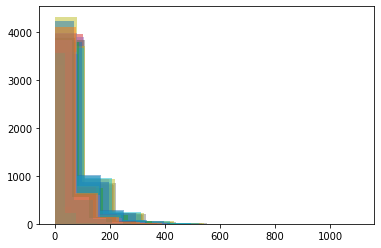

In [11]:

for df_name in node_attr_data_list:
    plt.hist(node_attr_data_list[df_name]['Degree'], alpha=0.5)
plt.show()

""


In [7]:
degree_df = pd.DataFrame()
for df_name in node_attr_data_list.keys():
    degree_df=degree_df.append(node_attr_data_list[df_name],ignore_index=True)

In [9]:
degree_df.DayHourInt.values

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [17]:
weekday_df = degree_df[degree_df['DayType']=='WEEKDAY']
weekend_df = degree_df[degree_df['DayType']=='WEEKEND']

In [18]:
# remove null value from LogDegree

weekend_df = weekend_df[weekend_df['LogDegree'].notna()]
weekday_df = weekday_df[weekday_df['LogDegree'].notna()]

In [96]:
degree_df.shape

(116377, 27)

In [88]:
# get mean and std of both dataframes
mean_weekday = np.mean(weekday_df['Degree'])
std_weekday = np.std(weekday_df['Degree'])

mean_weekend = np.mean(weekend_df['Degree'])
std_weekend = np.std(weekend_df['Degree'])

In [89]:
import scipy.stats as stats


(0.0, 1010.0)

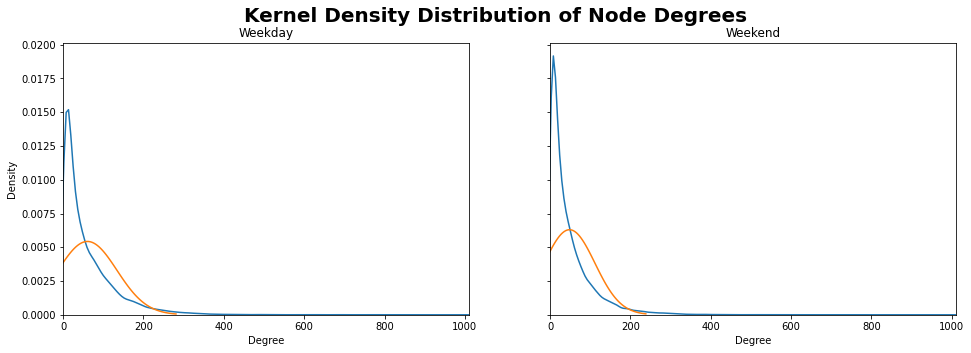

In [96]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(16,5))
fig.suptitle('Kernel Density Distribution of Node Degrees',fontweight="bold", size=20)

sns.kdeplot(ax=axes[0],x=weekday_df["Degree"],legend=False,
                alpha=0.05)
x = np.linspace(mean_weekday - 3*std_weekday, mean_weekday + 3*std_weekday, 100)
axes[0].plot(x, stats.norm.pdf(x, mean_weekday, std_weekday))
axes[0].set_title("Weekday")
axes[0].set_xlim([0,np.max(weekday_df['Degree'])])

sns.kdeplot(ax=axes[1],x=weekend_df["Degree"],legend=False,
                alpha=0.05)
axes[1].set_title("Weekend")
x = np.linspace(mean_weekend - 3*std_weekend, mean_weekend + 3*std_weekend, 100)
axes[1].plot(x, stats.norm.pdf(x, mean_weekend, std_weekend))
axes[1].set_xlim([0,np.max(weekend_df['Degree'])])

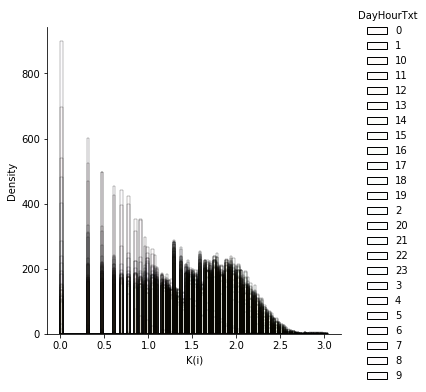

In [11]:
ax = sns.displot(degree_df, x="LogDegree", hue='DayHourTxt', kind='hist', alpha=0.02)  #kind = hist/ecdf/kde
ax.set(xlabel='K(i)', ylabel='Density')
plt.show()

Text(0.5, 1.0, 'Weekend')

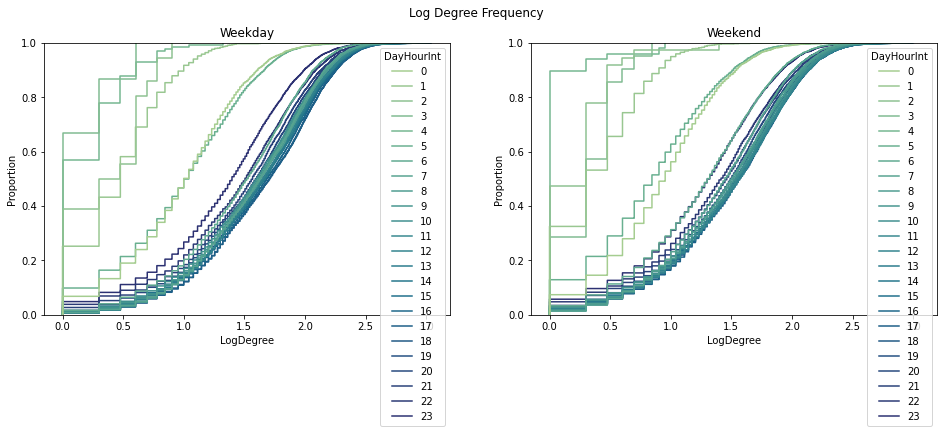

In [18]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(16,5))
fig.suptitle('Log Degree Frequency')

sns.ecdfplot(weekday_df, x="LogDegree",hue='DayHourInt',palette='crest',ax=axes[0])
axes[0].set_title("Weekday")

sns.ecdfplot(weekend_df, x="LogDegree",hue='DayHourInt',palette='crest',ax=axes[1])
axes[1].set_title("Weekend")

In [29]:
# update degree count by full day degree count - WEEKDAY

degree_sum = len(weekday_df['Degree'])
degree_count = weekday_df['Degree'].value_counts().to_dict()
weekday_df['Degree_Count'] = weekday_df['Degree'].apply(lambda x:degree_count[x])
weekday_df['Degree_Freq'] = weekday_df['Degree_Count']/degree_sum
weekday_df['LogDegreeCount'] = np.log10(weekday_df["Degree_Count"].replace(0, np.nan))
weekday_df['LogDegreeFreq'] = np.log10(weekday_df["Degree_Freq"].replace(0, np.nan))
weekday_df['LogDegree'] = np.log10(weekday_df["Degree"].replace(0, np.nan))
    
in_degree_sum = len(weekday_df['indegree'])
in_degree_count = weekday_df['indegree'].value_counts().to_dict()
weekday_df['in_degree_count'] = weekday_df['indegree'].apply(lambda x:in_degree_count[x])
weekday_df['in_degree_freq'] = weekday_df['in_degree_count']/in_degree_sum
weekday_df['LogInDegreeCount'] = np.log10(weekday_df["in_degree_count"].replace(0, np.nan))
weekday_df['LogInDegreeFreq'] = np.log10(weekday_df["in_degree_freq"].replace(0, np.nan))
weekday_df['LogInDegree'] = np.log10(weekday_df["indegree"].replace(0, np.nan))
    
out_degree_sum = len(weekday_df['outdegree'])
out_degree_count = weekday_df['outdegree'].value_counts().to_dict()
weekday_df['out_degree_count'] = weekday_df['outdegree'].apply(lambda x:out_degree_count[x])
weekday_df['out_degree_freq'] = weekday_df['out_degree_count']/out_degree_sum
weekday_df['LogOutDegreeCount'] = np.log10(weekday_df["out_degree_count"].replace(0, np.nan))
weekday_df['LogOutDegreeFreq'] = np.log10(weekday_df["out_degree_freq"].replace(0, np.nan))
weekday_df['LogOutDegree'] = np.log10(weekday_df["outdegree"].replace(0, np.nan))


In [30]:
# update degree count by full day degree count - WEEKEND

degree_sum = len(weekend_df['Degree'])
degree_count = weekend_df['Degree'].value_counts().to_dict()
weekend_df['Degree_Count'] = weekend_df['Degree'].apply(lambda x:degree_count[x])
weekend_df['Degree_Freq'] = weekend_df['Degree_Count']/degree_sum
weekend_df['LogDegreeCount'] = np.log10(weekend_df["Degree_Count"].replace(0, np.nan))
weekend_df['LogDegreeFreq'] = np.log10(weekend_df["Degree_Freq"].replace(0, np.nan))
weekend_df['LogDegree'] = np.log10(weekend_df["Degree"].replace(0, np.nan))
    
in_degree_sum = len(weekend_df['indegree'])
in_degree_count = weekend_df['indegree'].value_counts().to_dict()
weekend_df['in_degree_count'] = weekend_df['indegree'].apply(lambda x:in_degree_count[x])
weekend_df['in_degree_freq'] = weekend_df['in_degree_count']/in_degree_sum
weekend_df['LogInDegreeCount'] = np.log10(weekend_df["in_degree_count"].replace(0, np.nan))
weekend_df['LogInDegreeFreq'] = np.log10(weekend_df["in_degree_freq"].replace(0, np.nan))
weekend_df['LogInDegree'] = np.log10(weekend_df["indegree"].replace(0, np.nan))
    
out_degree_sum = len(weekend_df['outdegree'])
out_degree_count = weekend_df['outdegree'].value_counts().to_dict()
weekend_df['out_degree_count'] = weekend_df['outdegree'].apply(lambda x:out_degree_count[x])
weekend_df['out_degree_freq'] = weekend_df['out_degree_count']/out_degree_sum
weekend_df['LogOutDegreeCount'] = np.log10(weekend_df["out_degree_count"].replace(0, np.nan))
weekend_df['LogOutDegreeFreq'] = np.log10(weekend_df["out_degree_freq"].replace(0, np.nan))
weekend_df['LogOutDegree'] = np.log10(weekend_df["outdegree"].replace(0, np.nan))


Text(0.5, 1.0, 'Weekend')

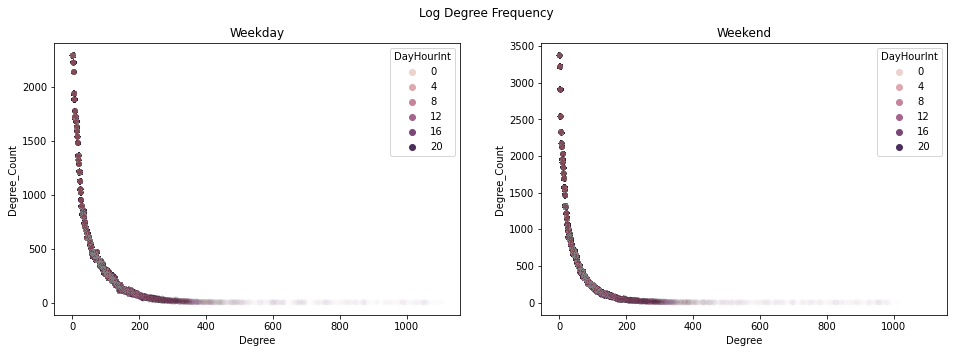

In [27]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,5))
fig.suptitle('Log Degree Frequency')

sns.scatterplot(ax=axes[0],x=weekday_df["Degree"], y=weekday_df["Degree_Count"],alpha=0.01, hue=weekday_df['DayHourInt'])
axes[0].set_title("Weekday")

sns.scatterplot(ax=axes[1],x=weekend_df["Degree"], y=weekend_df["Degree_Count"],alpha=0.01, hue=weekend_df['DayHourInt'])
axes[1].set_title("Weekend")

Text(0.5, 1.0, 'Weekend')

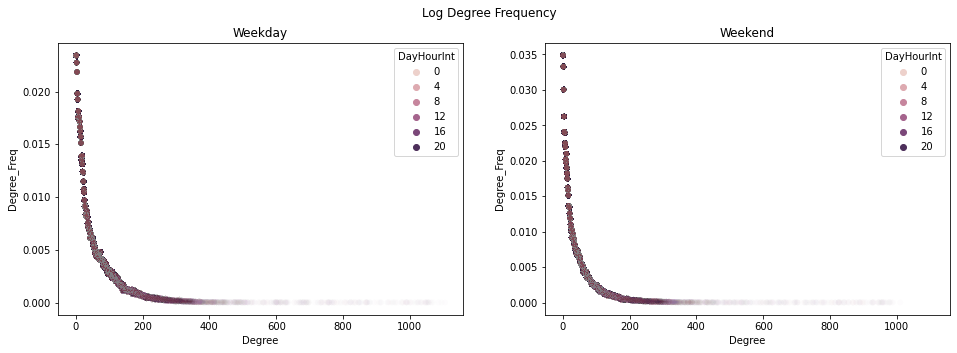

In [31]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,5))
fig.suptitle('Log Degree Frequency')

sns.scatterplot(ax=axes[0],x=weekday_df["Degree"], y=weekday_df["Degree_Freq"],alpha=0.01, hue=weekday_df['DayHourInt'])
axes[0].set_title("Weekday")

sns.scatterplot(ax=axes[1],x=weekend_df["Degree"], y=weekend_df["Degree_Freq"],alpha=0.01, hue=weekend_df['DayHourInt'])
axes[1].set_title("Weekend")

In [11]:
# get degree count in a day - Weekday
weekday_degree= weekday_df['Degree'].value_counts().to_dict()
weekday_df['DayDegreeCount'] = weekday_df['Degree'].apply(lambda x:weekday_degree[x])

C:\Users\ytxu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


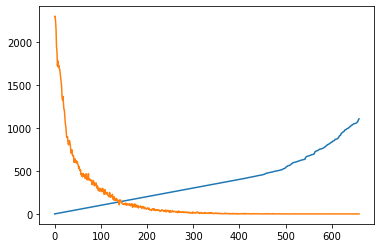

In [135]:
plt.plot((sorted(weekday_degree.items())))

C:\Users\ytxu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


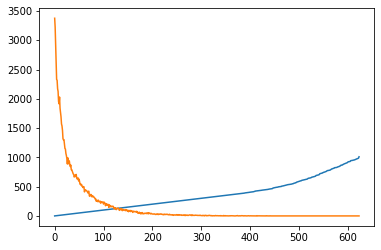

In [12]:
# get degree count in a day - Weekend

weekend_degree= weekend_df['Degree'].value_counts().to_dict()
weekend_df['DayDegreeCount'] = weekend_df['Degree'].apply(lambda x:weekend_degree[x])
plt.plot((sorted(weekend_degree.items())))

In [33]:
new_df = weekend_df.append(weekday_df)

In [35]:
new_df.columns

Index(['Id', 'Label', 'timeset', 'indegree', 'outdegree', 'Degree',
       'weighted indegree', 'weighted outdegree', 'Weighted Degree',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'Authority', 'Hub', 'modularity_class',
       'pageranks', 'componentnumber', 'strongcompnum', 'clustering',
       'eigencentrality', 'Degree_Count', 'Degree_Freq', 'LogDegreeCount',
       'LogDegreeFreq', 'LogDegree', 'in_degree_count', 'in_degree_freq',
       'LogInDegreeCount', 'LogInDegreeFreq', 'LogInDegree',
       'out_degree_count', 'out_degree_freq', 'LogOutDegreeCount',
       'LogOutDegreeFreq', 'LogOutDegree', 'DayType', 'DayHourInt',
       'DayHourTxt'],
      dtype='object')

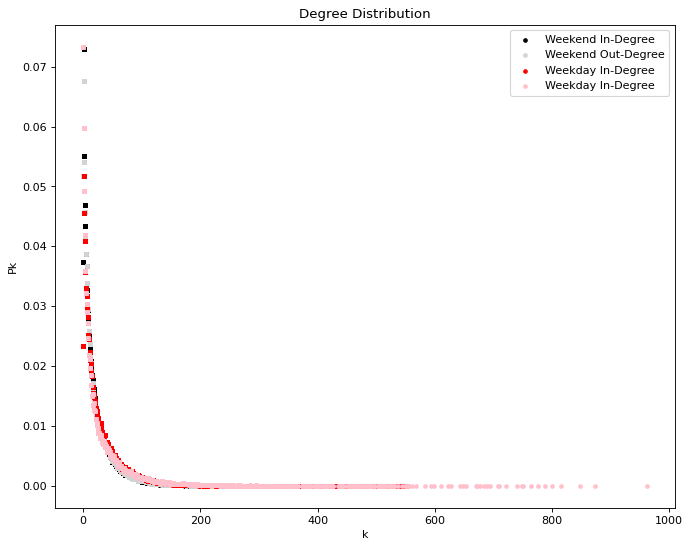

In [57]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['axes.facecolor'] = 'w'
ax1 = fig.add_subplot(111)

plt.title('Degree Distribution', fontweight=40)
#sns.scatterplot(x=new_df["Degree"], y=new_df["Degree_Freq"],alpha=0.01, 
#                hue=new_df['DayType'],size=0.001, style=new_df['DayType'],palette={'WEEKEND':'red',"WEEKDAY":'black'})

ax1.scatter(weekend_df['indegree'],weekend_df['in_degree_freq'], s=10, c='k', marker="o", 
            label='Weekend In-Degree', alpha=1)
ax1.scatter(weekend_df['outdegree'],weekend_df['out_degree_freq'], s=10, c='lightgray', marker="o", 
            label='Weekend Out-Degree', alpha=1)
ax1.scatter(weekday_df['indegree'],weekday_df['in_degree_freq'], s=10, c='red', marker="o", 
            label='Weekday In-Degree', alpha=1)
ax1.scatter(weekday_df['outdegree'],weekday_df['out_degree_freq'], s=10, c='pink', marker="o", 
            label='Weekday In-Degree', alpha=1)

ax1.set_xlabel("k")
ax1.set_ylabel("Pk")
ax1.legend()
plt.show()


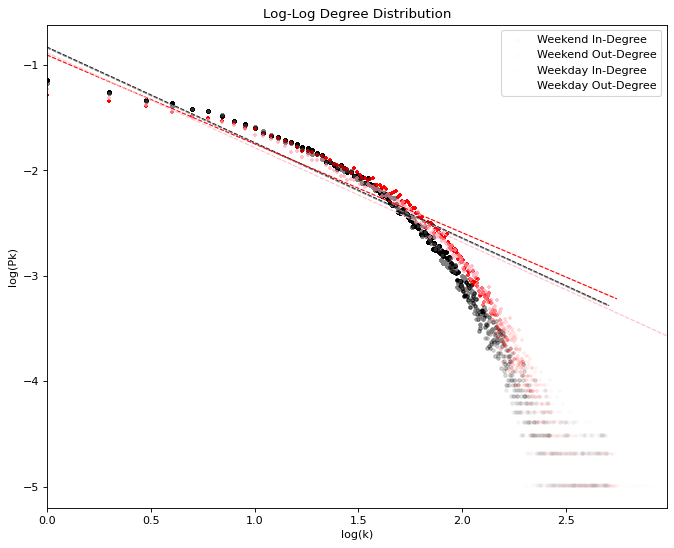

In [70]:
fig2 = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

plt.title('Log-Log Degree Distribution', fontweight=40)

# plot scatter plot
#ax2.scatter(weekend_df['LogInDegree'],weekend_df['LogInDegreeFreq'], s=10, c='k', marker="o", 
#           label='Weekend In-Degree', alpha=0.01)
#ax2.scatter(weekend_df['LogOutDegree'],weekend_df['LogOutDegreeFreq'], s=10, c='lightgray', marker="o", 
#            label='Weekend Out-Degree', alpha=0.01)
#ax2.scatter(weekday_df['LogInDegree'],weekday_df['LogInDegreeFreq'], s=10, c='red', marker="o", 
#            label='Weekday In-Degree', alpha=0.01)
#ax2.scatter(weekday_df['LogOutDegree'],weekday_df['LogOutDegreeFreq'], s=10, c='pink', marker="o", 
#            label='Weekday In-Degree', alpha=0.01)
sns.regplot(x=weekend_df['LogInDegree'],y=weekend_df['LogInDegreeFreq'], ax=ax2,color='k',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"},label='Weekend In-Degree')
sns.regplot(x=weekend_df['LogOutDegree'],y=weekend_df['LogOutDegreeFreq'], ax=ax2, color='gray',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"}, label='Weekend Out-Degree')

sns.regplot(x=weekday_df['LogInDegree'],y=weekday_df['LogInDegreeFreq'], ax=ax2,color='r', marker='+',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"}, label='Weekday In-Degree')
sns.regplot(x=weekday_df['LogOutDegree'],y=weekday_df['LogOutDegreeFreq'], ax=ax2, color='pink', marker='+',
            scatter_kws={'alpha':0.01,'s':10},line_kws={"lw":1,"ls":"--"}, label='Weekday Out-Degree')

ax2.set_xlabel("log(k)")
ax2.set_ylabel("log(Pk)")
ax2.legend()
plt.show()

In [80]:
# get the regression formula
from scipy import stats
mask = ~np.isnan(weekday_df['LogInDegree']) & ~np.isnan(weekday_df['LogInDegreeFreq'])
slope, intercept, r_value, p_value, std_err = stats.linregress(weekday_df['LogInDegree'][mask], 
                                                               weekday_df['LogInDegreeFreq'][mask])

#slope, intercept, r_value, p_value, std_err = stats.linregress(weekend_df['LogInDegree'],weekend_df['LogInDegreeFreq'])

# use line_kws to set line label for legend
print("y={0:.5f}x+{1:.5f}".format(slope,intercept))

y=-0.84331x+-0.90427


In [ ]:
## Backup
# plot Weekend in-degree fit line
z1 = np.polyfit(weekend_df["LogInDegree"], weekend_df["LogInDegreeFreq"], 1)
p1 = np.poly1d(z1)(weekend_df["LogInDegree"])
ax2.plot(weekend_df["LogInDegree"],p1,"k:", lw=2, alpha=0.5)

# plot weekday fit line
z2 = np.polyfit(weekday_df["LogOutDegree"], weekday_df["LogOutDegreeFreq"], 1)
p2 = np.poly1d(z2)(weekday_df["LogOutDegree"])
ax2.plot(weekday_df["LogOutDegree"],p2,"r:", lw=2, alpha=0.5)

# plot Weekend fit line
z3 = np.polyfit(weekend_df["LogInDegree"], weekend_df["LogInDegreeFreq"], 1)
p3 = np.poly1d(z3)(weekend_Df["LogInDegree"])
ax2.plot(weekend_df["LogInDegree"],p3,"k--", lw=2, alpha=0.5)

# plot weekday fit line
z4 = np.polyfit(weekday_df["LogOutDegree"], weekday_df["LogOutDegreeFreq"], 1)
p4 = np.poly1d(z4)(weekday_df["LogOutDegree"])
ax2.plot(nweekday_df["LogOutDegree"],p4,"r:", lw=2, alpha=0.5)

In [114]:
new_df = weekday_df.append(weekend_df)
new_df.head()

,Id,Label,timeset,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,...,strongcompnum,clustering,eigencentrality,Degree_Count,LogDegreeCount,LogDegree,DayType,DayHourInt,DayHourTxt,DayDegreeCount
0,72059,NaN,NaN,5,8,13,7,12,19,9,...,405.0,0.064103,0.008021,100,2.000000,1.113943,WEEKDAY,0,0,1632
1,84489,NaN,NaN,21,25,46,43,69,112,8,...,405.0,0.070048,0.100149,21,1.322219,1.662758,WEEKDAY,0,0,601
2,77209,NaN,NaN,21,10,31,49,25,74,8,...,405.0,0.095699,0.175083,32,1.505150,1.491362,WEEKDAY,0,0,803
3,76231,NaN,NaN,45,26,71,113,126,239,8,...,405.0,0.098793,0.387075,4,0.602060,1.851258,WEEKDAY,0,0,397
4,76101,NaN,NaN,73,55,128,375,377,752,8,...,405.0,0.069267,0.518470,2,0.301030,2.107210,WEEKDAY,0,0,194


In [141]:
# take log Day Degree Count
new_df['LogDayDegreeCount'] = np.log10(new_df["DayDegreeCount"].replace(0, np.nan))
new_df.head()

,Id,Label,timeset,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,...,clustering,eigencentrality,Degree_Count,LogDegreeCount,LogDegree,DayType,DayHourInt,DayHourTxt,DayDegreeCount,LogDayDegreeCount
98010,72059,NaN,NaN,2,5,7,5,6,11,8,...,0.142857,0.003486,183,2.262451,0.845098,WEEKEND,0,0,2173,3.337060
98011,84489,NaN,NaN,13,17,30,22,47,69,8,...,0.073563,0.082525,30,1.477121,1.477121,WEEKEND,0,0,942,2.974051
98012,77021,NaN,NaN,18,17,35,75,38,113,8,...,0.157143,0.204461,23,1.361728,1.544068,WEEKEND,0,0,789,2.897077
98013,84009,NaN,NaN,156,101,257,546,1616,2162,7,...,0.026954,0.888832,1,0.000000,2.409933,WEEKEND,0,0,19,1.278754
98014,84459,NaN,NaN,8,5,13,9,17,26,7,...,0.153846,0.043078,102,2.008600,1.113943,WEEKEND,0,0,1763,3.246252


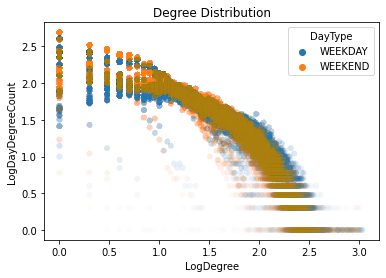

In [117]:
plt.title('Degree Distribution')
sns.scatterplot(x=new_df["LogDegree"], y=new_df["LogDayDegreeCount"],alpha=0.01, hue=new_df['DayType'])
plt.show()

In [92]:
day_cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

C:\Users\ytxu\AppData\Local\ESRI\conda\envs\ge6211\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ytxu\AppData\Local\ESRI\conda\envs\ge6211\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


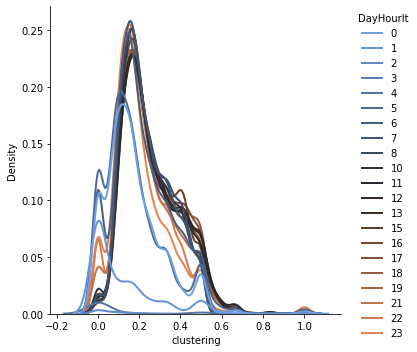

In [95]:
sns.displot(degree_df, x="clustering", hue='DayHourIt', kind='kde',palette=day_cmap,alpha=0.5,linewidth=2)

# Create Graphs for Every Hour and Day Type

In [9]:
import networkx as nx
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
input_data_folder = r"C:\Users\ytxu\Documents\ArcGIS\Projects\GE6211SDH\Processed\202101\Edge\Bus"
file_list = os.listdir(input_data_folder)
edgelist_list = [f for f in file_list if ".edgelist" in f]

graph_dict = defaultdict(nx.DiGraph)

for edgelist_filename in edgelist_list:
    #print(edgelist_filename)

    year_month = edgelist_filename.split("_")[1]
    day_type = edgelist_filename.split("_")[2]
    hour = edgelist_filename.split("_")[-1].split(".")[0]  # in text

    graph_name = "{}_{}_{}".format(year_month, day_type, hour)

    edge_list = os.path.join(input_data_folder, edgelist_filename)
    if not os.path.exists(edge_list):
        continue

    new_graph = nx.read_weighted_edgelist(edge_list)
    graph_dict[graph_name] = new_graph

In [4]:
knn_dict = {}
degree_dict = {}

for graph in graph_dict.keys():
    #print(graph)
    knn_dict[graph] = nx.k_nearest_neighbors(graph_dict[graph], weight='weight')
    degree_dict[graph] = {(x):y for (x,y) in graph_dict[graph].degree(weight='weight')}

    

In [5]:
# split dict to weekend vs weekday
weekday_knn = {}
weekend_knn = {}

for key in knn_dict.keys():
    
    day_type = key.split("_")[1]
    day_hour = int(key.split("_")[-1])
    
    if day_type=="WEEKDAY":
        weekday_knn[day_hour] = knn_dict[key]
    else:
        weekend_knn[day_hour] = knn_dict[key]
        
weekday_knn = dict(sorted(weekday_knn.items()))
weekend_knn = dict(sorted(weekend_knn.items()))

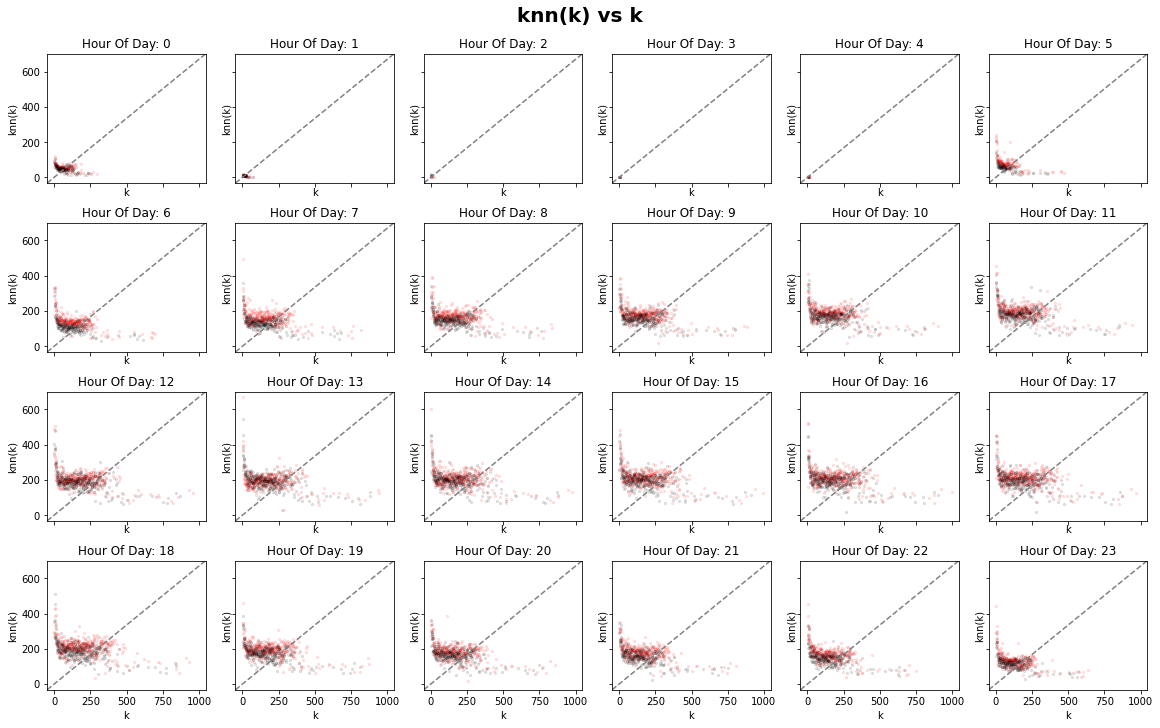

In [30]:
# distribution of Degree vs KNN
fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('knn(k) vs k',fontweight="bold", size=20)

count = 0
for key in weekday_knn.keys():

    x = count%6
    y = int(count/6)
    dn = pd.DataFrame(list(weekday_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    dn_weekend = pd.DataFrame(list(weekend_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    
    dn['LogDegree'] = np.log10(dn["Degree"].replace(0, np.nan))
    dn['LogAvgDegreeKNN'] = np.log10(dn["AvgDegreeKNN"].replace(0, np.nan))
     
    dn_weekend['LogDegree'] = np.log10(dn_weekend["Degree"].replace(0, np.nan))
    dn_weekend['LogAvgDegreeKNN'] = np.log10(dn_weekend["AvgDegreeKNN"].replace(0, np.nan))

    # sns.scatterplot(data=dn, x="Degree",y="AvgDegreeKNN",ax=axes[y][x], alpha=0.05)
    axes[y][x].scatter(x=dn["Degree"], y=dn["AvgDegreeKNN"], alpha=0.1, color='r', s=5)
    axes[y][x].scatter(x=dn_weekend["Degree"], y=dn_weekend["AvgDegreeKNN"], alpha=0.1, color='k', s=5)
    axes[y][x].plot([0, 1], [0, 1], color='gray', transform=axes[y][x].transAxes, linestyle='--')  
    
    #grid = sns.lmplot(data=dn, x="Degree", y="AvgDegreeKNN", ax=axes[y][x])
    #grid.plot_joint(plt.scatter, color="g")
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    
    axes[y][x].set_title("Hour Of Day: " + str(key), size=12)
    axes[y][x].set_ylabel("knn(k)")
    axes[y][x].set_xlabel("k")

    count += 1    
    
plt.show()

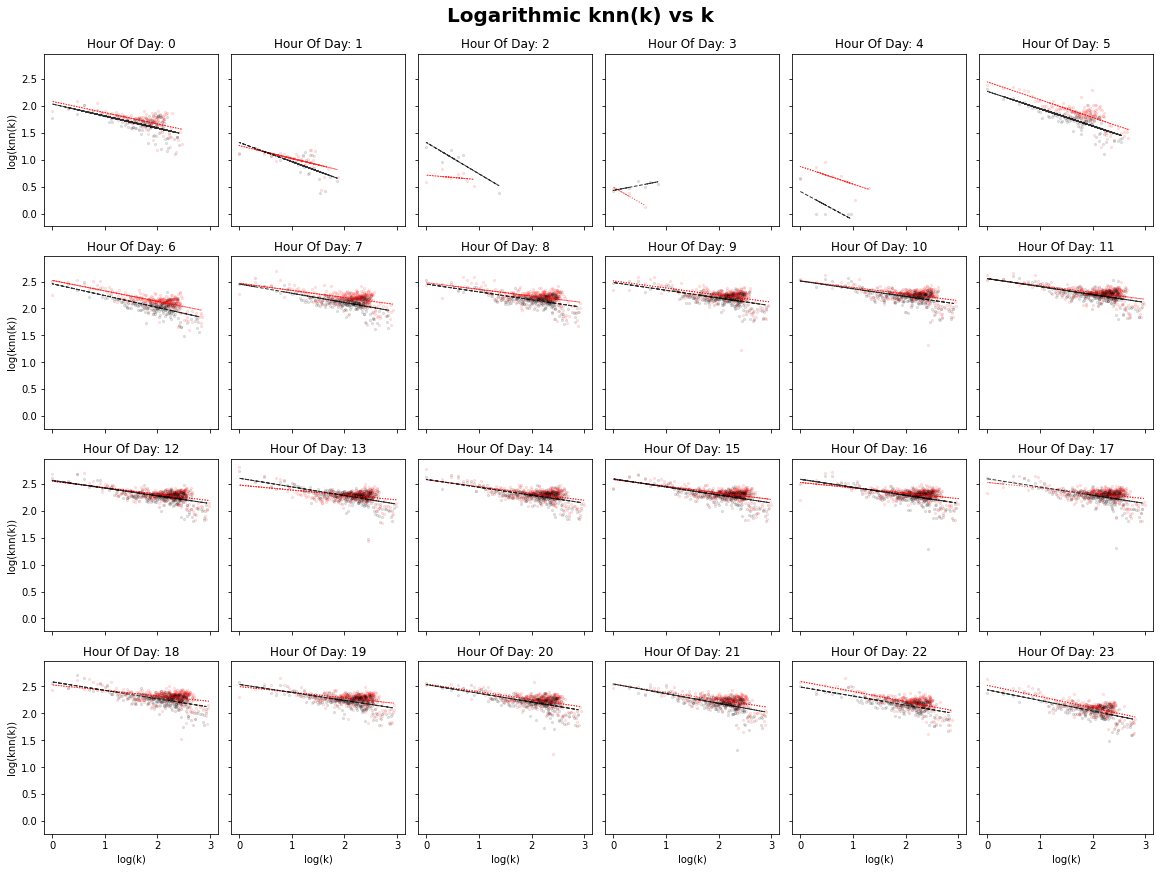

In [56]:
# distribution of Degree vs KNN
fig, axes = plt.subplots(4,6, figsize=(16,12), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Logarithmic knn(k) vs k',fontweight="bold", size=20)

count = 0
for key in weekday_knn.keys():

    x = count%6
    y = int(count/6)
    dn = pd.DataFrame(list(weekday_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    weekend_dn = pd.DataFrame(list(weekend_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    
    dn['LogDegree'] = np.log10(dn["Degree"].replace(0, np.nan))
    dn['LogAvgDegreeKNN'] = np.log10(dn["AvgDegreeKNN"].replace(0, np.nan))
    
    weekend_dn['LogDegree'] = np.log10(weekend_dn["Degree"].replace(0, np.nan))
    weekend_dn['LogAvgDegreeKNN'] = np.log10(weekend_dn["AvgDegreeKNN"].replace(0, np.nan))

    # sns.scatterplot(data=dn, x="Degree",y="AvgDegreeKNN",ax=axes[y][x], alpha=0.05)
    axes[y][x].scatter(x=dn["LogDegree"], y=dn["LogAvgDegreeKNN"], alpha=0.1, color='red', s=5)
    #axes[y][x].axhline(y=np.mean(dn['LogAvgDegreeKNN']),xmin=0,xmax=3,c="pink",linewidth=1,zorder=0)
    z = np.polyfit(dn["LogDegree"], dn["LogAvgDegreeKNN"], 1)
    p = np.poly1d(z)(dn["LogDegree"])
    axes[y][x].plot(dn["LogDegree"],p,"r:", lw=1, alpha=0.8, c='r')
    
    axes[y][x].scatter(x=weekend_dn["LogDegree"], y=weekend_dn["LogAvgDegreeKNN"], alpha=0.1, color='k', s=5)
    #axes[y][x].axhline(y=np.mean(weekend_dn['LogAvgDegreeKNN']),xmin=0,xmax=3,c="gray",linewidth=1,zorder=0)
    z2 = np.polyfit(weekend_dn["LogDegree"], weekend_dn["LogAvgDegreeKNN"], 1)
    p2 = np.poly1d(z2)(weekend_dn["LogDegree"])
    axes[y][x].plot(weekend_dn["LogDegree"],p2,"k--", lw=1, alpha=0.8)
    
    if x==0:
        axes[y][x].set_ylabel("log(knn(k))")
    if y==3:
        axes[y][x].set_xlabel("log(k)")
 
    
    #grid = sns.lmplot(data=dn, x="Degree", y="AvgDegreeKNN", ax=axes[y][x])
    #grid.plot_joint(plt.scatter, color="g")
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    
    axes[y][x].set_title("Hour Of Day: " + str(key), size=12)
    #axes[y][x].set_xlim([0, 3])
    #axes[y][x].set_ylim([0, 3])

    count += 1    
    
plt.show()

In [48]:
# overall knn plot

all_weekday_df = pd.DataFrame()
for key in weekday_knn.keys():
    
    dn = pd.DataFrame(list(weekday_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    
    dn['LogDegree'] = np.log10(dn["Degree"].replace(0, np.nan))
    dn['LogAvgDegreeKNN'] = np.log10(dn["AvgDegreeKNN"].replace(0, np.nan))
    dn['DayHourInt'] = key
    
    
    all_weekday_df = all_weekday_df.append(dn)
    

In [49]:
# overall knn plot - weekend

all_weekend_df = pd.DataFrame()
for key in weekend_knn.keys():
    
    weekend_dn = pd.DataFrame(list(weekend_knn[key].items()),columns = ['Degree','AvgDegreeKNN']) 
    
    weekend_dn['LogDegree'] = np.log10(weekend_dn["Degree"].replace(0, np.nan))
    weekend_dn['LogAvgDegreeKNN'] = np.log10(weekend_dn["AvgDegreeKNN"].replace(0, np.nan))
    weekend_dn['DayHourInt'] = key
    
    
    all_weekend_df = all_weekend_df.append(weekend_dn)
    

Text(0.5, 0, 'log(k)')

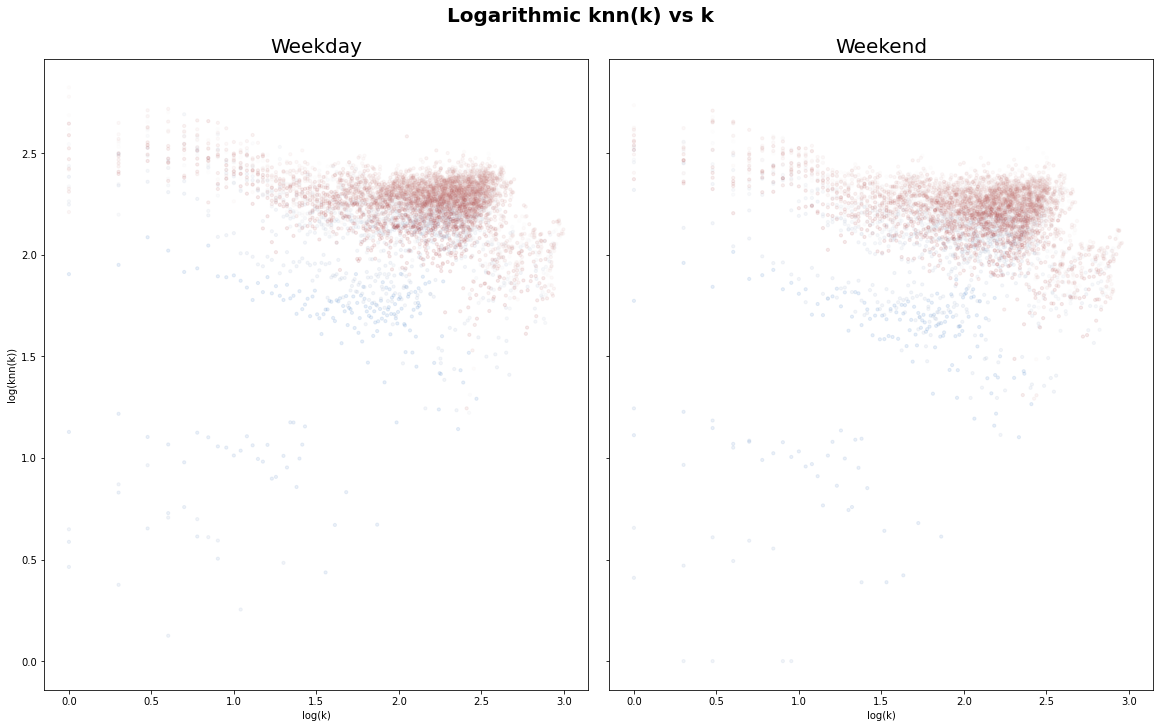

In [55]:
fig, axes = plt.subplots(1,2, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Logarithmic knn(k) vs k',fontweight="bold", size=20)

axes[0].scatter(x=all_weekday_df["LogDegree"], y=all_weekday_df["LogAvgDegreeKNN"], 
            alpha=0.1, c=all_weekday_df['DayHourInt'], s=10, cmap='vlag')
axes[0].set_title("Weekday",fontsize=20)

axes[1].scatter(x=all_weekend_df["LogDegree"], y=all_weekend_df["LogAvgDegreeKNN"], 
            alpha=0.1, c=all_weekend_df['DayHourInt'], s=10, cmap='vlag')
axes[1].set_title("Weekend",fontsize=20)

axes[0].set_ylabel("log(knn(k))")
axes[0].set_xlabel("log(k)")
axes[1].set_xlabel("log(k)")


# Plot Joint Degree Distribution through Graphs

In [32]:
graph_dict.keys()

dict_keys(['202101_WEEKDAY_0', '202101_WEEKDAY_1', '202101_WEEKDAY_10', '202101_WEEKDAY_11', '202101_WEEKDAY_12', '202101_WEEKDAY_13', '202101_WEEKDAY_14', '202101_WEEKDAY_15', '202101_WEEKDAY_16', '202101_WEEKDAY_17', '202101_WEEKDAY_18', '202101_WEEKDAY_19', '202101_WEEKDAY_2', '202101_WEEKDAY_20', '202101_WEEKDAY_21', '202101_WEEKDAY_22', '202101_WEEKDAY_23', '202101_WEEKDAY_3', '202101_WEEKDAY_4', '202101_WEEKDAY_5', '202101_WEEKDAY_6', '202101_WEEKDAY_7', '202101_WEEKDAY_8', '202101_WEEKDAY_9', '202101_WEEKENDSHOLIDAY_0', '202101_WEEKENDSHOLIDAY_1', '202101_WEEKENDSHOLIDAY_10', '202101_WEEKENDSHOLIDAY_11', '202101_WEEKENDSHOLIDAY_12', '202101_WEEKENDSHOLIDAY_13', '202101_WEEKENDSHOLIDAY_14', '202101_WEEKENDSHOLIDAY_15', '202101_WEEKENDSHOLIDAY_16', '202101_WEEKENDSHOLIDAY_17', '202101_WEEKENDSHOLIDAY_18', '202101_WEEKENDSHOLIDAY_19', '202101_WEEKENDSHOLIDAY_2', '202101_WEEKENDSHOLIDAY_20', '202101_WEEKENDSHOLIDAY_21', '202101_WEEKENDSHOLIDAY_22', '202101_WEEKENDSHOLIDAY_23', '2021

In [49]:
weekday_graph = dict(sorted({int(graph.split("_")[-1]):graph_dict[graph] for graph in graph_dict.keys() if "WEEKDAY" in graph}.items()))
weekend_graph = dict(sorted({int(graph.split("_")[-1]):graph_dict[graph] for graph in graph_dict.keys() if "WEEKEND" in graph}.items()))

In [50]:
weekday_graph.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [62]:
# get joint distribution df: SourceDegree, DestDegree
weekday_joint_degree_dist_df = {}
for day_hour in weekday_graph.keys():
    
    G = weekday_graph[day_hour]
    
    source_dest_degree = {'SourceDegree':[], 'DestDegree':[]}
    
    edge_list = G.edges()
    for edge in edge_list:
        source_node = edge[0]
        dest_node = edge[1]
        
        source_dest_degree['SourceDegree'].append(G.degree[source_node])
        source_dest_degree['DestDegree'].append(G.degree[dest_node])
       
        
    weekday_joint_degree_dist_df[day_hour] = pd.DataFrame(source_dest_degree)

len(weekday_joint_degree_dist_df)

24

In [55]:
# get joint distribution df: SourceDegree, DestDegree
weekend_joint_degree_dist_df = {}
for day_hour in weekend_graph.keys():
    
    G = weekend_graph[day_hour]
    
    source_dest_degree = {'SourceDegree':[], 'DestDegree':[]}
    
    edge_list = G.edges()
    for edge in edge_list:
        source_node = edge[0]
        dest_node = edge[1]
        
        source_dest_degree['SourceDegree'].append(G.degree[source_node])
        source_dest_degree['DestDegree'].append(G.degree[dest_node])
        
        
    weekend_joint_degree_dist_df[day_hour] = pd.DataFrame(source_dest_degree)

len(weekend_joint_degree_dist_df)

24

In [ ]:
fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Joint Degree Distribution (Weekday) - scatter plot',fontweight="bold", size=20)
    
for day_hour in weekday_joint_degree_dist_df.keys():
    
    x = day_hour%6
    y = int(day_hour/6)
    
    hour_df = weekday_joint_degree_dist_df[day_hour]
    hour_df['LogSourceDegree'] = np.log(hour_df['SourceDegree'].replace(0, np.nan))
    hour_df['LogDestDegree'] = np.log(hour_df['DestDegree'].replace(0, np.nan))
    
    axes[y][x].scatter(x=hour_df['LogSourceDegree'], y=hour_df['LogDestDegree'], alpha=0.01, c='maroon')
    axes[y][x].set_title("Hour Of Day: " + str(day_hour), fontweight="bold", size=12)
    

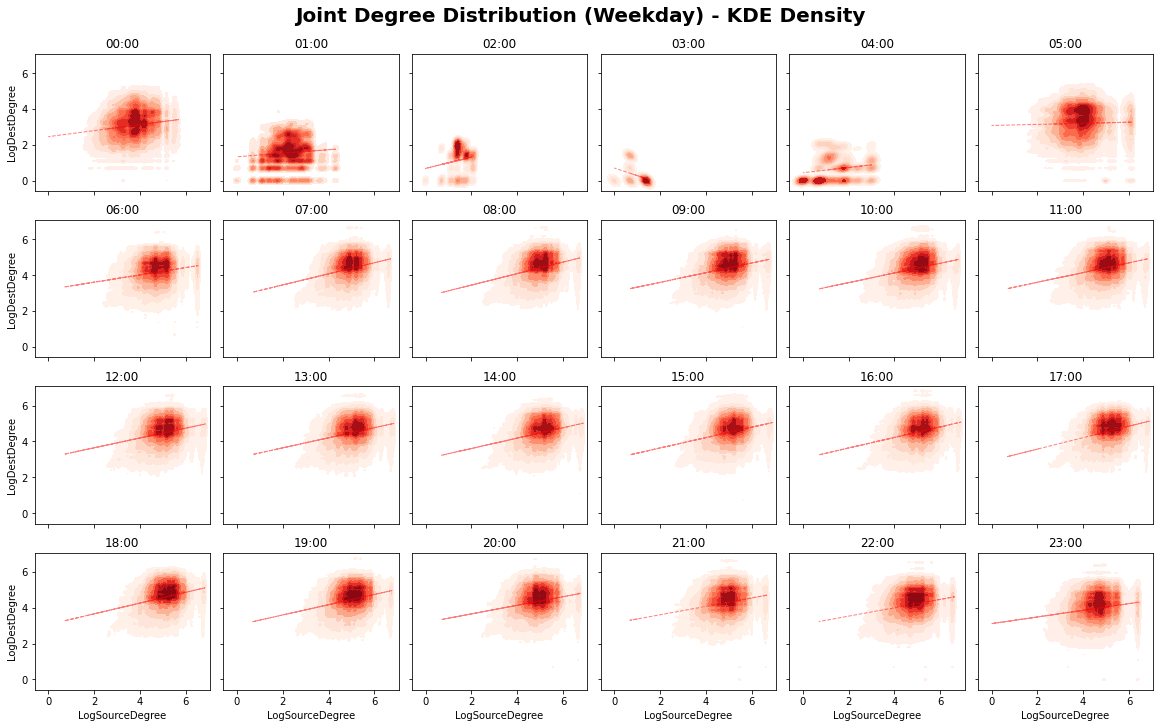

In [73]:
from scipy.stats import kde

fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Joint Degree Distribution (Weekday) - KDE Density',fontweight="bold", size=20)

for day_hour in weekday_joint_degree_dist_df.keys():
    
    i = day_hour%6
    j = int(day_hour/6)
    
    hour_df = weekday_joint_degree_dist_df[day_hour]
    hour_df['LogSourceDegree'] = np.log(hour_df['SourceDegree'].replace(0, np.nan))
    hour_df['LogDestDegree'] = np.log(hour_df['DestDegree'].replace(0, np.nan))
    
    x = hour_df['LogSourceDegree']
    y = hour_df['LogDestDegree']
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)(x)
    axes[j][i].plot(x, p,"r--", lw=1, alpha=0.5)
    
    axes[j][i].set_title("{}:00".format(str(day_hour).zfill(2)), fontweight=10)
    
      
    sns.kdeplot(x=x, y=y, cmap="Reds", shade=True, bw_adjust=.5, ax=axes[j][i])
    
plt.show()

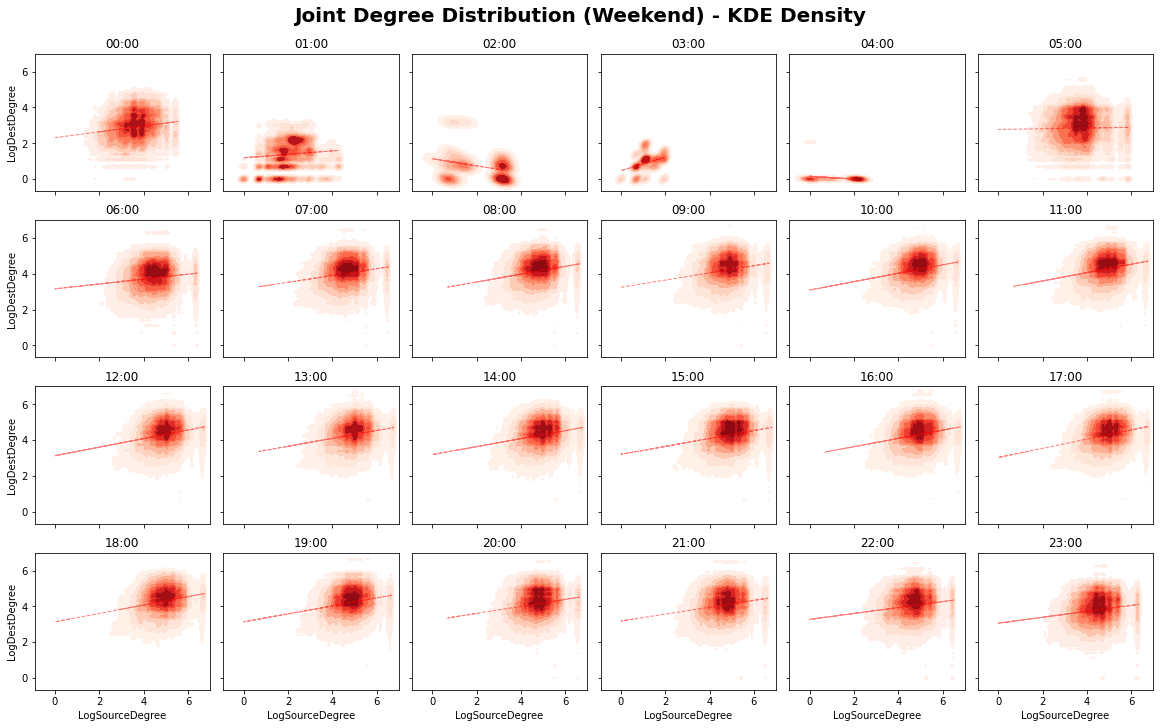

In [74]:
fig, axes = plt.subplots(4,6, figsize=(16,10), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('Joint Degree Distribution (Weekend) - KDE Density',fontweight="bold", size=20)

for day_hour in weekend_joint_degree_dist_df.keys():
    
    i = day_hour%6
    j = int(day_hour/6)
    
    hour_df = weekend_joint_degree_dist_df[day_hour]
    hour_df['LogSourceDegree'] = np.log(hour_df['SourceDegree'].replace(0, np.nan))
    hour_df['LogDestDegree'] = np.log(hour_df['DestDegree'].replace(0, np.nan))
    
    x = hour_df['LogSourceDegree']
    y = hour_df['LogDestDegree']
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)(x)
    axes[j][i].plot(x, p,"r--", lw=1, alpha=0.5)
    
    axes[j][i].set_title("{}:00".format(str(day_hour).zfill(2)), fontweight=10)
    
      
    sns.kdeplot(x=x, y=y, cmap="Reds", shade=True, bw_adjust=.5, ax=axes[j][i])
    
plt.show()

ModuleNotFoundError: No module named 'plotly'